<a href="https://colab.research.google.com/github/pkondacs/marketdata/blob/master/Asset_Portfolio_by_using_yfinance_tickers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install some necessary packages

In [3]:
# activates the matplotlib to be displayed inline
# %matplotlib inline
# %pip install pandas-datareader
# %pip install quandl
# %pip install python-dotenv
# %pip install yfinance

import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns

tickers = ["AAPL","MSFT","NG=F","CL=F"]
# Set the investment weights (arbitrarily weights as an example)
weights = np.array([.25, .3, .15, .3])
# Set an initial investment level
initial_investment = 1000000

# Fetch stock price data for Apple and Microsoft
dfs = []
for ticker in tickers:
    df = yf.download(ticker, start="2000-01-01")
    dfs.append(df)

# Concatenate Apple and Microsoft stock price dataframes
combined_df = pd.concat([df['Close'] for df in dfs], axis=1, keys=tickers)
combined_df.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,AAPL,MSFT,NG=F,CL=F
Date,,,,
2000-01-03,0.999442,58.28125,NaN,NaN
2000-01-04,0.915179,56.31250,NaN,NaN
2000-01-05,0.928571,56.90625,NaN,NaN
2000-01-06,0.848214,55.00000,NaN,NaN
2000-01-07,0.888393,55.71875,NaN,NaN


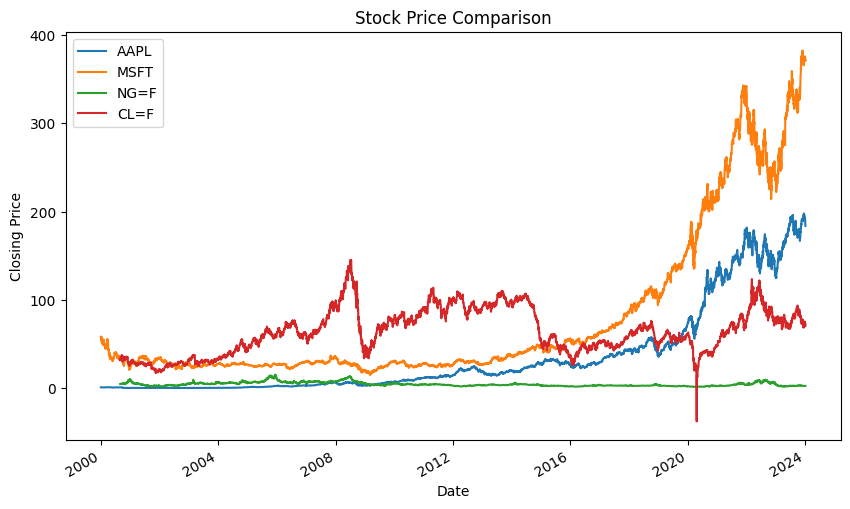

In [4]:
import matplotlib.pyplot as plt

# Plot the combined stock price data
combined_df.plot(figsize=(10, 6))

# Set the chart title and labels
plt.title('Stock Price Comparison')
plt.xlabel('Date')
plt.ylabel('Closing Price')

# Display the legend
plt.legend(tickers)

# Display the chart
plt.show()

In [5]:
print(combined_df.index)

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2023-12-19', '2023-12-20', '2023-12-21', '2023-12-22',
               '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29',
               '2024-01-02', '2024-01-03'],
              dtype='datetime64[ns]', name='Date', length=6044, freq=None)


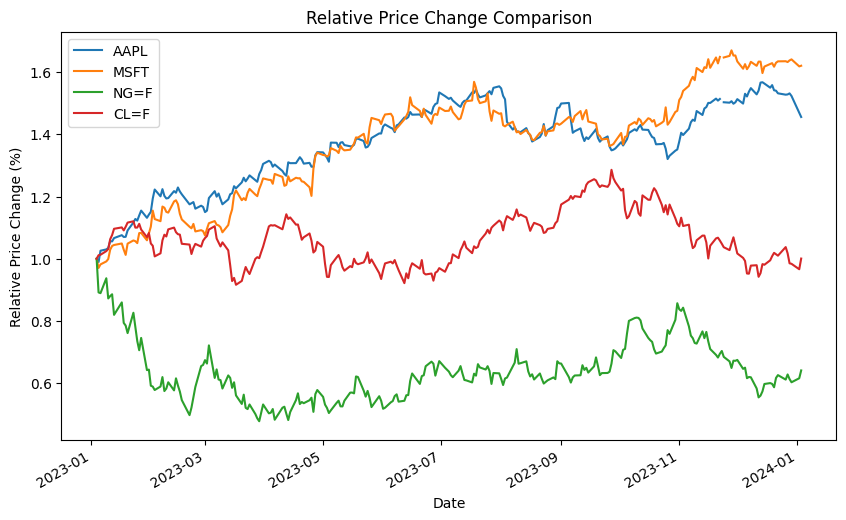

In [6]:
# Define the fixed date from which to calculate relative price change
fixed_date = '2023-01-04'

# Check if the fixed date is present in the index
if fixed_date not in combined_df.index:
    print(f"Fixed date {fixed_date} is not present in the data.")
else:
    # combined_df['Date'] = pd.to_datetime(combined_df['Date']) # Date is already datetime type
    # combined_df.set_index('Date', inplace=True) # Date is already an index in the imported yfinance dataframe

    # Ensure the fixed_date is a datetime object
    fixed_date = pd.to_datetime(fixed_date)
    # Get the prices on the fixed date
    fixed_date_prices = combined_df.loc[fixed_date]
    # Calculate the percentage change relative to the fixed date
    price_changes = combined_df.divide(fixed_date_prices)

    # Slice the DataFrame to only include rows from the fixed_date onwards
    price_changes_from_fixed = price_changes.loc[fixed_date:]

    # Plot the relative price change data
    price_changes_from_fixed.plot(figsize=(10, 6)) # You can adjust the figure size as needed
    # Set the chart title and labels
    plt.title('Relative Price Change Comparison')
    plt.xlabel('Date')
    plt.ylabel('Relative Price Change (%)')
    # Display the legend
    plt.legend(tickers)
    # Display the chart
plt.show()

<Axes: >

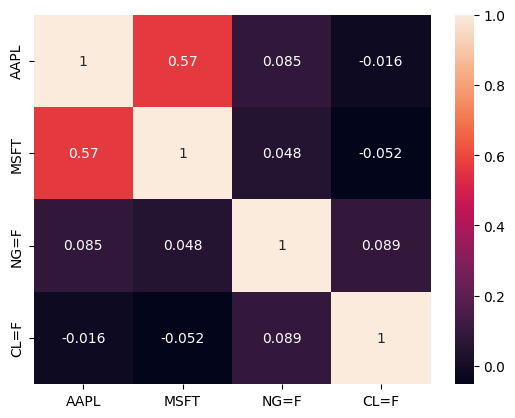

In [18]:
# Define the fixed date from which to calculate relative price change
fixed_date = '2023-01-04'

prf_returns_pct = (combined_df.loc[fixed_date:].pct_change())[1:]
prf_returns = (prf_returns_pct + 1)
log_returns = np.log(prf_returns)
corr = log_returns.corr()
sns.heatmap(corr, annot=True)

In [19]:
print(prf_returns_pct)

                AAPL      MSFT      NG=F      CL=F
Date                                              
2023-01-05 -0.010605 -0.029638 -0.108341  0.011395
2023-01-06  0.036794  0.011785 -0.002688  0.001357
2023-01-09  0.004089  0.009736  0.053908  0.011658
2023-01-10  0.004456  0.007617 -0.069309  0.006566
2023-01-11  0.021112  0.030238  0.008794  0.030485
...              ...       ...       ...       ...
2023-12-27  0.000518 -0.001575  0.027059 -0.019320
2023-12-28  0.002226  0.003235 -0.023673 -0.031575
2023-12-29 -0.005424  0.002025 -0.016817 -0.001672
2024-01-02 -0.035787 -0.013749  0.021480 -0.017725
2024-01-03 -0.008942  0.001294  0.040888  0.035521

[251 rows x 4 columns]


# Volatility vs average return of assets n this code:

1.   The std() method calculates the standard deviation of the daily returns for each stock, which we are using as a proxy for volatility.
2.   The mean() method calculates the average of the daily returns for each stock.
2.   We then create a new DataFrame called stock_metrics that contains these two metrics.
1.   We use plt.scatter() to create a scatter plot with volatility on the x-axis and average return on the y-axis.
2.   The loop that follows plt.scatter() goes through each stock in stock_metrics and annotates the points on the plot with their respective stock names (labels).
1.   Finally, we set up the title, labels, grid, and display the plot with plt.show()

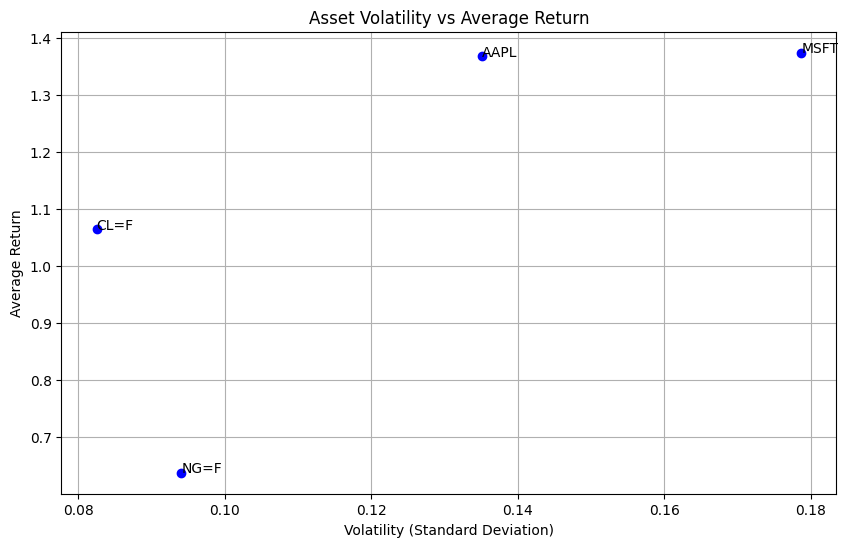

In [9]:
import matplotlib.pyplot as plt

# Calculate volatility (standard deviation) and average return for each stock
volatility = price_changes_from_fixed.std()
average_returns = price_changes_from_fixed.mean()

# Create a DataFrame with the calculated metrics
asset_metrics = pd.DataFrame({'Volatility': volatility, 'Average_Return': average_returns})

# Plotting the metrics
plt.figure(figsize=(10, 6))
plt.scatter(asset_metrics['Volatility'], asset_metrics['Average_Return'], color='blue')

# Annotate each point with the stock name
for i in asset_metrics.index:
    plt.annotate(i, (asset_metrics.loc[i, 'Volatility'], asset_metrics.loc[i, 'Average_Return']))

# Set the title and labels of the plot
plt.title('Asset Volatility vs Average Return')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Average Return')

# Show the plot
plt.grid(True)
plt.show()

# VAR calculation (var/cov matrix approach)

1. Calculate variance/vovariance matrix

In [20]:
# Generate Var-Cov matrix based on returns
cov_matrix = prf_returns_pct.cov()
cov_matrix

,AAPL,MSFT,NG=F,CL=F
AAPL,0.000162,0.000112,0.000048,-0.000004
MSFT,0.000112,0.000241,0.000032,-0.000017
NG=F,0.000048,0.000032,0.001864,0.000078
CL=F,-0.000004,-0.000017,0.000078,0.000441


2. Portfolio mean and standard deviation

In [21]:
# Calculate mean returns for each stock
avg_rets = prf_returns_pct.mean()

# Calculate mean returns for portfolio overall using dot product to
# normalize individual means against investment weights
# https://en.wikipedia.org/wiki/Dot_product#:~:targetText=In%20mathematics%2C%20the%20dot%20product,and%20returns%20a%20single%20number.
portf_mean = avg_rets.dot(weights)

# Calculate portfolio standard deviation
portf_stdev = np.sqrt(weights.T.dot(cov_matrix).dot(weights))

# Calculate mean of the investment
mean_investment = (1+portf_mean) * initial_investment

# Calculate the standard deviation of the investment
stdev_investment = initial_investment * portf_stdev

3. Calculate the inverse of the normal cumulative distribution (PPF)

In [23]:
# Provide an appropriate confidence interval
conf_level = 0.05
from scipy.stats import norm

# Using SciPy ppf method to generate values for the inverse cumulative distribution function to a normal distribution
# Inserting the mean, standard deviation of our portfolio as calculated above
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
cutoff = norm.ppf(conf_level, mean_investment, stdev_investment)
print(cutoff)

981468.0298632099


4. Estimate the value at risk (VaR)

In [24]:
# Subtract the initial investment from the VaR cutoff amount
var_1d1 = initial_investment - cutoff
var_1d1

18531.97013679007

5. Value at risk over n-day time period

1 day VaR @ 95% confidence: 18531.97
2 day VaR @ 95% confidence: 26208.16
3 day VaR @ 95% confidence: 32098.31
4 day VaR @ 95% confidence: 37063.94
5 day VaR @ 95% confidence: 41438.74
6 day VaR @ 95% confidence: 45393.87
7 day VaR @ 95% confidence: 49030.98
8 day VaR @ 95% confidence: 52416.33
9 day VaR @ 95% confidence: 55595.91
10 day VaR @ 95% confidence: 58603.24
11 day VaR @ 95% confidence: 61463.59
12 day VaR @ 95% confidence: 64196.63
13 day VaR @ 95% confidence: 66817.97
14 day VaR @ 95% confidence: 69340.28
15 day VaR @ 95% confidence: 71774.01


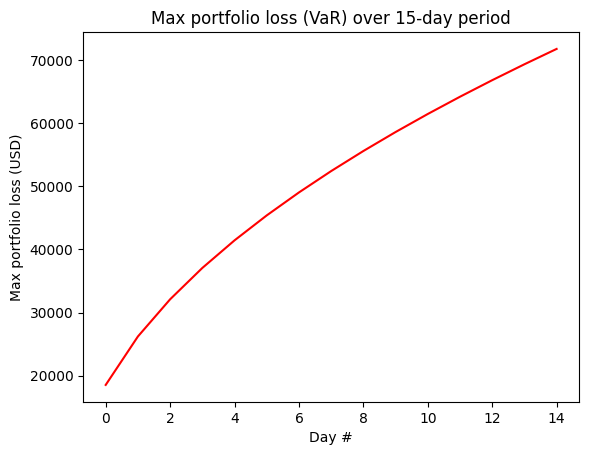

In [25]:
# Calculate n Day VaR
var_array = []
num_days = int(15)
for x in range(1, num_days+1):
    var_array.append(np.round(var_1d1 * np.sqrt(x),2))
    print(str(x) + " day VaR @ 95% confidence: " + str(np.round(var_1d1 * np.sqrt(x),2)))

# Build plot
plt.xlabel("Day #")
plt.ylabel("Max portfolio loss (USD)")
plt.title("Max portfolio loss (VaR) over 15-day period")
plt.plot(var_array, "r")

In [ ]:
# To be continued from the following website:
# https://www.interviewqs.com/blog/value-at-risk